Taking inspiration from http://charlesleifer.com/blog/using-python-and-k-means-to-find-the-dominant-colors-in-images/,
trying to do some image analysis on the instagram posts I collected

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import pymongo
from pymongo import MongoClient
client = MongoClient()

In [24]:
from sklearn.cluster import KMeans

In [20]:
from pprint import pprint
from collections import namedtuple

again, for illustration, what one data entry looks like on the db

In [9]:
db = client.instagramLondon
coll = db.posts
cursor = coll.find().sort('created_time', pymongo.DESCENDING).limit(1)
for i in cursor:
    pprint(i)

{'_id': ObjectId('57d5e31f481b6270985285ea'),
 'attribution': None,
 'caption': {'created_time': '1473461710',
             'from': {'full_name': 'Kristina Hakenová',
                      'id': '370200716',
                      'profile_picture': 'https://scontent.cdninstagram.com/t51.2885-19/s150x150/891307_168416020201675_1963667798_a.jpg',
                      'username': 'tina_8.8'},
             'id': '17862075955062337',
             'text': '"No story lives unless someone wants to listen" J.K. '
                     'Rowling'},
 'comments': {'count': 0},
 'created_time': '1473461710',
 'filter': 'Inkwell',
 'id': '1335816100835081861_370200716',
 'images': {'low_resolution': {'height': 320,
                               'url': 'https://scontent.cdninstagram.com/t51.2885-15/s320x320/e35/14145604_522798707915224_1265389708_n.jpg?ig_cache_key=MTMzNTgxNjEwMDgzNTA4MTg2MQ%3D%3D.2.l',
                               'width': 320},
            'standard_resolution': {'height': 640,
 

In [58]:
#lets open the image from one entry 
#response = requests.get('https://scontent.cdninstagram.com/t51.2885-15/s320x320/e35/14145604_522798707915224_1265389708_n.jpg?ig_cache_key=MTMzNTgxNjEwMDgzNTA4MTg2MQ%3D%3D.2.l')
response = requests.get('https://upload.wikimedia.org/wikipedia/en/e/e7/Jurassic_Park_poster.jpg')
img = Image.open(BytesIO(response.content))

In [59]:
#the low res version should be fine
w, h = img.size

In [21]:
#saving the counts of every color in the image as a list
Point = namedtuple('Point', ('coords', 'n', 'ct'))
points = []
w, h = img.size
for count, color in img.getcolors(w * h):
    points.append(Point(color, 3, count))

In [22]:
points

[Point(coords=(255, 255, 255), n=3, ct=19944),
 Point(coords=(253, 253, 253), n=3, ct=1172),
 Point(coords=(251, 251, 251), n=3, ct=652),
 Point(coords=(249, 249, 249), n=3, ct=656),
 Point(coords=(247, 247, 247), n=3, ct=659),
 Point(coords=(245, 245, 245), n=3, ct=622),
 Point(coords=(243, 243, 243), n=3, ct=581),
 Point(coords=(241, 241, 241), n=3, ct=494),
 Point(coords=(239, 239, 239), n=3, ct=462),
 Point(coords=(237, 237, 237), n=3, ct=538),
 Point(coords=(235, 235, 235), n=3, ct=578),
 Point(coords=(233, 233, 233), n=3, ct=455),
 Point(coords=(231, 231, 231), n=3, ct=394),
 Point(coords=(229, 229, 229), n=3, ct=359),
 Point(coords=(227, 227, 227), n=3, ct=378),
 Point(coords=(225, 225, 225), n=3, ct=350),
 Point(coords=(223, 223, 223), n=3, ct=323),
 Point(coords=(221, 221, 221), n=3, ct=340),
 Point(coords=(219, 219, 219), n=3, ct=314),
 Point(coords=(217, 217, 217), n=3, ct=300),
 Point(coords=(215, 215, 215), n=3, ct=296),
 Point(coords=(213, 213, 213), n=3, ct=319),
 Point(

In [60]:
#next is to try kmeans on it
#following the example from http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
imgAsArr = np.array(img, dtype=np.float64)/255


In [61]:
w, h, d = imgAsArr.shape
image_array = np.reshape(imgAsArr, (w * h, d))


In [62]:
image_array.shape

(107600, 3)

In [63]:
kmeans = KMeans(n_clusters=5).fit(image_array)

In [64]:
kmeans.cluster_centers_

array([[ 0.20815573,  0.17793506,  0.16703899],
       [ 0.00504274,  0.00341299,  0.0036488 ],
       [ 0.87756776,  0.59991092,  0.25199935],
       [ 0.94908647,  0.9261989 ,  0.85900222],
       [ 0.87221809,  0.01283994,  0.01602423]])

In [65]:
palettes = kmeans.cluster_centers_ * 255
print(palettes)

[[  53.07971144   45.3734414    42.59494122]
 [   1.28589745    0.87031211    0.93044294]
 [ 223.77977839  152.97728532   64.2598338 ]
 [ 242.01704898  236.18071916  219.04556727]
 [ 222.4156138     3.27418442    4.08617764]]


In [46]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [49]:
test = img.convert('P', palette=Image.ADAPTIVE, colors=5)
colors = test.getcolors(w * h)

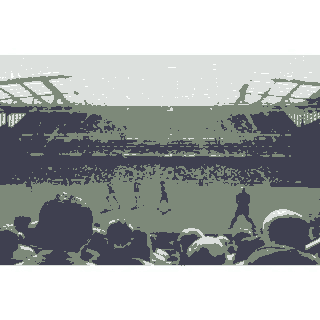

In [52]:
test

In [57]:
test.palette